In [1]:
from eyring_model import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import scipy.stats as stats

In [2]:
T = 300
multi = True
dH_barrier = 3.5
dS_barrier = -9/T
dH_sigma = dH_barrier/3
dS_sigma = -dS_barrier/3
n_jumps = 50

(0.0, 60.0)

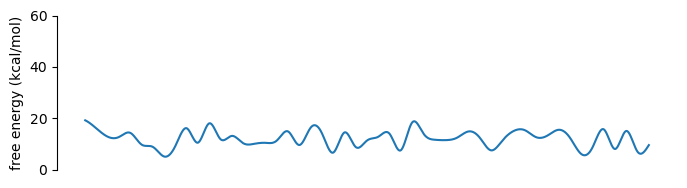

In [4]:
barrier_dist = 'norm'
barrier_params = {'mu' : np.array([dH_barrier, dS_barrier]),
                  'cov': np.array([[dH_sigma**2, 0],
                                   [0, dS_sigma**2]])}

model = Path(T=T, n_jumps=n_jumps)
dG, dH, dS = model.generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
jumps = model.jump_lengths.cumsum()

path_spline = CubicSpline(jumps, dG, bc_type='natural')
xs = np.linspace(0, jumps.max(), num=2000)
ys = path_spline(xs)

fig, ax = plt.subplots(1,1, figsize=(8,2))
ax.plot(xs, ys, color='tab:blue')
ax.set_ylabel('free energy (kcal/mol)')
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,60)
# plt.savefig('/Users/nate_schwindt/Projects/Presentations/NAMS_2024/normal_profile.pdf', background=False)

In [ ]:
barrier_dist = 'exponential'
barrier_params = {'beta' : np.array([dH_barrier, dS_barrier])}

model = Path(T=T, n_jumps=n_jumps)
dG, dH, dS = model.generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params, seed=1)
jumps = model.jump_lengths.cumsum()
dG_eff = model.calculate_effective_barrier()

path_spline = CubicSpline(jumps, dG, bc_type='natural')
xs = np.linspace(0, jumps.max(), num=2000)
ys = path_spline(xs)

fig, ax = plt.subplots(1,1, figsize=(8,2))
ax.plot(xs, ys, color='tab:orange')
# ax.axhline(dG_eff, c='tab:orange', ls='dashed')
# ax.set_ylabel('free energy (kcal/mol)')
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,60)
# plt.savefig('/Users/nate_schwindt/Projects/Presentations/NAMS_2024/exponential_profile_effective.pdf')

(0.0, 60.0)

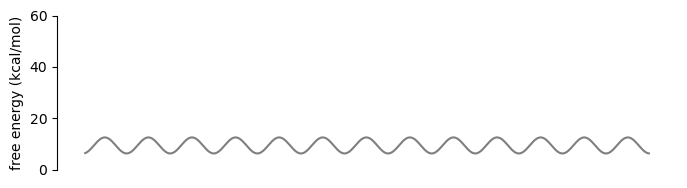

In [5]:
barrier_dist = 'equal'
barrier_params = {'mu' : np.array([dH_barrier, dS_barrier])}

model = Path(T=T, n_jumps=n_jumps)
dG, dH, dS = model.generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
jumps = model.jump_lengths.cumsum()

xs = np.linspace(-np.pi/2, jumps.max(), num=2000)
ys = dG.mean()/4 * np.sin(xs/1.25) + dG.mean()*3/4

fig, ax = plt.subplots(1,1, figsize=(8,2))
ax.plot(xs, ys, color='tab:gray')
ax.set_ylabel('free energy (kcal/mol)')
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,60)
# plt.savefig('/Users/nate_schwindt/Projects/Presentations/NAMS_2024/equal_profile.pdf', background=False)

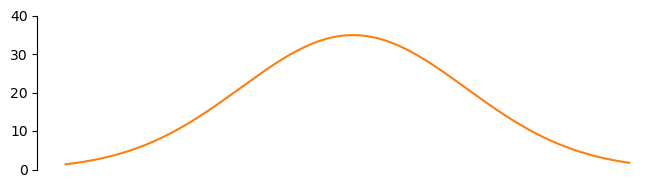

In [6]:
import scipy.stats as stats

barrier_dist = 'exponential'
barrier_params = {'beta' : np.array([dH_barrier, dS_barrier])}

model = Path(T=T, n_jumps=n_jumps)
dG, dH, dS = model.generate_membrane_barriers(dist=barrier_dist, multi=multi, dist_params=barrier_params)
jumps = model.jump_lengths.cumsum()

xs = np.linspace(0, jumps.max(), num=2000)
ys = 1750*stats.norm.pdf(xs, jumps.mean(), 20)

fig, ax = plt.subplots(1,1, figsize=(8,2))
ax.plot(xs, ys, color='tab:orange')
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,40);

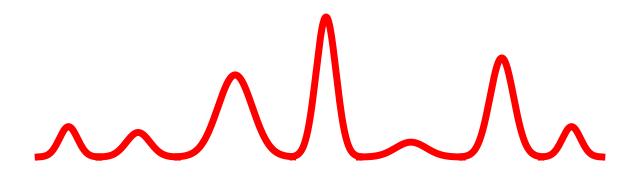

In [40]:
fig, ax = plt.subplots(1,1, figsize=(8,2))

xs = np.linspace(0, 10, num=2000)
ys = stats.norm.pdf(xs, 5, 1.5)*0.25
ax.plot(xs, ys, color='red', lw=5)

h = 1
l = 10
running_l = 10
for i in range(5):
    rng = np.random.default_rng()
    h = rng.uniform(0.1,1.5)
    l = round(rng.uniform(10,20))
    xs = np.linspace(0, l, num=2000)
    ys = stats.norm.pdf(xs, l/2, 1.5/10*l)*h
    ax.plot(xs+running_l, ys, color='red', lw=5)
    running_l += l

xs = np.linspace(0, 10, num=2000)
ys = stats.norm.pdf(xs, 5, 1.5)*0.25
ax.plot(xs+running_l, ys, color='red', lw=5)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('/Users/nate_schwindt/Projects/eyring_model/figs/barriers.pdf', transparent=True)